ABSTRACT

Resume parsing refers to the automated storage, organization and analysis of job resumes. Resume parsing software provides companies an efficient way to identify keywords, skills, and so forth, in order to sort through large quantities of applications to identify the best applicants. Resume parsers analyze a resume, extract the desired information, and insert the information into a database with a unique entry for each candidate. Once the resume has been analyzed, a recruiter can search the database for keywords and phrases and get a list of relevant candidates.

Parse information from a resume using natural language processing (NLP), find the keywords, cluster them onto sectors based on their keywords and lastly show the most relevant resume to the employer based on keyword matching. First, the user uploads a resume to the web platform. The parser parses all the necessary information from the resume and auto fills a form for the user to proofread. 

I collected two hundred resume data as in pickled format for creating an NLP model to train my data. Most of the basic pre-processing, data visualisation and machine learning steps will be used here. The proposed NLP model is promising in extracting the key words and their context for different resumes. And the comparison between the actual resume data to the model based predicted data is carried out by the help of Fuzzywuzzy library. The Fuzzy ratio shows the accuracy of predicted data to the actual data and improvement of the prediction accuracy and suggest that the model can be used in other resumes as well.



#Instalation of Libraries

In [1]:
pip install PyMuPDF

     |████████████████████████████████| 8.7 MB 5.6 MB/s 


In [2]:
pip install fuzzywuzzy[speedup]

     |████████████████████████████████| 50 kB 2.7 MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149867 sha256=969337146be2e253f086818e3797fc13348a052655b4be21d3e623ec50f09061
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-levenshtein


**PyMuPDF** is a Python binding for MuPDF – a lightweight PDF, XPS, and E-book viewer, renderer, and toolkit, which is maintained and developed by Artifex Software, Inc. MuPDF can access files in PDF, XPS, OpenXPS, CBZ, EPUB and FB2 (e-books) formats, and it is known for its top performance and high rendering quality.

**FuzzyWuzzy** is a library of Python which is used for string matching. Fuzzy string matching is the process of finding strings that match a given pattern. Basically it uses Levenshtein Distance to calculate the differences between sequences. FuzzyWuzzy has been developed and open-sourced by SeatGeek, a service to find sport and concert tickets. 

# Loading Library

In [3]:
#load libraries

import spacy
import pickle
import random


import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from fuzzywuzzy import process, fuzz

**SpaCy** is a free, open-source library for advanced Natural Language Processing (NLP) in Python. SpaCy provides an exceptionally efficient statistical system for NER in python, which can assign labels to groups of tokens which are contiguous. It provides a default model which can recognize a wide range of named or numerical entities, which include person, organization, language, event etc. Apart from these default entities, spaCy also gives us the liberty to add arbitrary classes to the NER model, by training the model to update it with newer trained examples.

**Python pickle** module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. 

**Python Random** module is an in-built module of Python which is used to generate random numbers. This module can be used to perform random actions such as generating random numbers, print random a value for a list or string, etc.

**Pandas** is an open-source library that is built on top of NumPy library. It is a Python package that offers various data structures and operations for manipulating numerical data and time series. It is mainly popular for importing and analyzing data much easier. Pandas is fast and it has high-performance & productivity for users.

**NumPy** is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

**Seaborn**  is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily.\

**Matplotlib** is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. It was introduced by John Hunter in the year 2002. One of the greatest benefits of visualization is that it allows us visual access to huge amounts of data in easily digestible visuals.

# Loading pickle file

In [4]:
train_data = pickle.load(open('/content/train_data.pkl', 'rb'))

#First train data

train_data[0]

('Govardhana K Senior Software Engineer  Bengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/ b2de315d95905b68  Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month • Salesforce Developer Oracle 5 Years 2 Month • Core Java Developer Languages Core Java, Go Lang Oracle PL-SQL programming, Sales Force Developer with APEX.  Designations & Promotions  Willing to relocate: Anywhere  WORK EXPERIENCE  Senior Software Engineer  Cloud Lending Solutions -  Bangalore, Karnataka -  January 2018 to Present  Present  Senior Consultant  Oracle -  Bangalore, Karnataka -  November 2016 to December 2017  Staff Consultant  Oracle -  Bangalore, Karnataka -  January 2014 to October 2016  Associate Consultant  Oracle -  Bangalore, Karnataka -  November 2012 to December 2013  EDUCATION  B.E in Computer Science Engineering  Adithya Institute of Technology -  Tamil Nadu  September 2008 to June 2012  https://www.indeed.com/r/Govardhana-K/b2de315d95905b68?isid=rex-

To open the file for writing, simply use the open() function. The first argument should be the name of your file. The second argument is 'wb'. The 'w' means that you'll be writing to the file, and b refers to binary mode. This means that the data will be written in the form of byte objects. This pickle file(ie, train_data.pkl) contain nearly two hundred resume data in compressed form. it is used to train our model. 

# NLP model creation

In [5]:
#load model

nlp = spacy.blank('en')
def train_model(train_data):
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last = True)
    
    for _, annotation in train_data:
        for ent in annotation['entities']:
            ner.add_label(ent[2])
            
    
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        for itn in range(10):
            print("Statring iteration " + str(itn))
            random.shuffle(train_data)
            losses = {}
            index = 0
            for text, annotations in train_data:
                try:
                    nlp.update(
                        [text],  # batch of texts
                        [annotations],  # batch of annotations
                        drop=0.2,  # dropout - make it harder to memorise data
                        sgd=optimizer,  # callable to update weights
                        losses=losses)
                except Exception as e:
                    pass
                
            print(losses)

In this first the blank model is created after that ner model is added it help to add the labels from the file. after the model creation and pipe line checking its going through the train data with random shuffle.

In [6]:
#passing trained data in our model
train_model(train_data)

Statring iteration 0
{'ner': 12132.647536099637}
Statring iteration 1
{'ner': 9292.267437321592}
Statring iteration 2
{'ner': 9065.259428343023}
Statring iteration 3
{'ner': 7848.1575358989685}
Statring iteration 4
{'ner': 5293.43602185203}
Statring iteration 5
{'ner': 7292.920740155449}
Statring iteration 6
{'ner': 5386.397857025261}
Statring iteration 7
{'ner': 5199.825756753805}
Statring iteration 8
{'ner': 5888.256726958203}
Statring iteration 9
{'ner': 5593.726414282507}


In [7]:
nlp.to_disk('nlp_model')

In [8]:
#loading the model
nlp_model = spacy.load('nlp_model')

In [9]:
#display the zeroth index datain trained dataset
train_data[0][0]

'Shivasai Mantri Microsoft dynamics AX Technical consultant  Hyderabad, Telangana - Email me on Indeed: indeed.com/r/Shivasai-Mantri/ eb5df334d3959e42  Achieve challenging Organizational Goals by applying creative problem solving skills to benefit mutual growth and success.  Willing to relocate: Anywhere  WORK EXPERIENCE  Microsoft dynamics AX Technical consultant  Indian Terrain Fashions Limited -  October 2016 to Present  Developing the new modules and menus and customizing the existing modules in AX as per the company requirement  Microsoft dynamics AX Technical consultant  ABA Technology Services  Developing the new modules and menus and customizing the existing modules in AX as per the company requirement  EDUCATION  BE in Computer science  Sreenidhi Institute of science and technology -  Hyderabad, Telangana  August 2011 to June 2015  Narayana Junior College -  Hyderabad, Telangana  SSC  Vamshi High school -  Bodhan, Andhra Pradesh  SKILLS  asp.net, dynamics ax technical consulta

In [10]:
doc = nlp_model(train_data[0][0])
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

NAME                          - Shivasai Mantri
DESIGNATION                   - Microsoft dynamics AX Technical consultant
LOCATION                      - Hyderabad
EMAIL ADDRESS                 - indeed.com/r/Shivasai-Mantri/ eb5df334d3959e42
DESIGNATION                   - Microsoft dynamics AX Technical consultant
COMPANIES WORKED AT           - Microsoft
DESIGNATION                   - Technical consultant
DEGREE                        - BE in Computer science
COLLEGE NAME                  - Sreenidhi Institute of science and technology
GRADUATION YEAR               - 2015
COLLEGE NAME                  - Vamshi High school
SKILLS                        - asp.net, dynamics ax technical consultant, sql, x++


From our trained model and data the zeroth position resume data is extracted with labels and thier values. Each time the resume data is shuffled here. because to check the availability of all data. This model creation help to avoide each time execution of code. one the medel is loaded then we can upload the data then get the result.

# Resume Loading

# **Resume 1**

In [11]:
import sys, fitz
fname = '/content/Jebacerin L_C#_5.10yrs.pdf'
doc = fitz.open(fname)
text = ""
for page in doc:
    text = text + str(page.getText())
tx = " ".join(text.split('\n'))
print(tx)

        Jebacerin.L,  TamilNadu, India   Mobile : + 91  Email :@gmail.com      PROFILE    An experienced .NET practitioner in designing, developing using Microsoft .NET Framework with 3  years experience.Has good exposure in developing robust, interactive and data driven web  applications enhancing and modifying them as necessary to ensure the best experience for the  user. An Engineering graduate BE in Computer Science and Engineering & ME in  Computer Science and Engineering with First Class with excellent track record of delivering  commitments on time and high quality.       EXPERIENCE SUMMARY    Exenta Software Pvt. Ltd (Trivandrum) – Software Engineer   (5 OCT 2015 to 26 OCT 2018)    Inspirisys Solutions Pvt Ltd (Trivandrum) – Software Engineer  (29 OCT 2018 – 16 JUL 2019)    MSN Ltd(Trivandrum) –Software Engineer  (17 JUL 2019 – Till Date)        CERTIFICATIONS    DotNet from E-VisionLab.        SKILLSET    ●  C#.NET, ASP.NET, .NET Framework 4.5,WPF, XML, WebServices,    Web API

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


In [12]:
doc = nlp_model(tx)
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

DESIGNATION                   - Software Engineer
COMPANIES WORKED AT           - Engineer
DESIGNATION                   - IIS Express
GRADUATION YEAR               - 2014
DESIGNATION                   - Project Name
GRADUATION YEAR               - 2018
DESIGNATION                   - Hr Software
COLLEGE NAME                  - Hr Software        Project
DEGREE                        - Developer


In [13]:
#Dictionary creation

In [14]:
dict1 = {"NAME":[], "DEGREE":[], "DESIGNATION":[], "SKILLS":[] ,"COLLEGE NAME":[], "LOCATION":[],"GRADUATION YEAR":[],"COMPANIES WORKED AT":[],"EMAIL ADDRESS":[]}
for ent in doc.ents:
  dict1[ent.label_.upper()].append(ent.text)

In [15]:
dict1

{'COLLEGE NAME': ['Hr Software        Project'],
 'COMPANIES WORKED AT': ['Engineer'],
 'DEGREE': ['Developer'],
 'DESIGNATION': ['Software Engineer',
  'IIS Express',
  'Project Name',
  'Hr Software'],
 'EMAIL ADDRESS': [],
 'GRADUATION YEAR': ['2014', '2018'],
 'LOCATION': [],
 'NAME': [],
 'SKILLS': []}

# **Resume 2**

In [16]:
fname = '/content/Shaniba M_Angular_3.5Yrs.pdf'
doc = fitz.open(fname)
text = ""
for page in doc:
    text = text + str(page.getText())
tx = " ".join(text.split('\n'))
print(tx)

    Photo  Address  Mob1:   Mob2:   SHANIBA M   OBJECTIVE    To gain confidence and fame using my potential in the field of software, and express  my innovative creative, managerial, technical skills for self and company growth.  CAREER SUMMARY   •  B-tech graduate with 3+ year experience in web applications and hybrid  mobile application development.  •  Excellent communication and inter-personal skills with experience of  interacting with the endusers and resolving their queries to their  satisfaction.  •  Ability to grasp the ideas of the clients and implement in the same  direction.  TECHNICAL SKILLS   LANGUAGES:  •  ANGULAR 2 AND ABOVE (ANGULAR 8 CURRENTLY WORKING), TYPESCRIPT, IONIC 3, JAVASCRIPT,  HTML 5, CSS 3, C, C++, REACT JS(OVERVIEW), PYTHON(OVERVIEW)  •  SOFTWARE TESTING(MANUAL)  •  OPERATING SYSTEMS: WINDOWS 10, WINDOWS 7, WINDOWS 8, LINUX, UBUNTU  •  MATLAB, PLC SCADA  •  OVER VIEW: MS OFFICE, MS EXCEL, MS OUTLOOK.  SOFTWARE SKILLS   •  Web and Mobile application develop

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


In [17]:
doc = nlp_model(tx)
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

DEGREE                        - Photo
DEGREE                        - B-tech graduate
GRADUATION YEAR               - 2019


In [18]:
#Dictionary creation

In [19]:
dict2 = {"NAME":[], "DEGREE":[], "DESIGNATION":[], "SKILLS":[] ,"COMPANIES WORKED AT":[],"COLLEGE NAME":[], "LOCATION":[],"GRADUATION YEAR":[],"EMAIL ADDRESS":[]}
for ent in doc.ents:
  dict2[ent.label_.upper()].append(ent.text)

In [20]:
dict2

{'COLLEGE NAME': [],
 'COMPANIES WORKED AT': [],
 'DEGREE': ['Photo', 'B-tech graduate'],
 'DESIGNATION': [],
 'EMAIL ADDRESS': [],
 'GRADUATION YEAR': ['2019'],
 'LOCATION': [],
 'NAME': [],
 'SKILLS': []}

# **Resume 3**

In [21]:
fname = '/content/Sailesh Earath Krishnan_UI UX_6.5yrs.pdf'
doc = fitz.open(fname)
text = ""
for page in doc:
    text = text + str(page.getText())
tx = " ".join(text.split('\n'))
print(tx)

1    CURRICULUM VITAE        Sailesh Earath Krishnan  Email ID: @gmail.com  Phone: +91   Portfolio:   Skype ID:           OBJECTIVE    To have a challenging long-term career in a good organization where I can apply my skills and  experience and grow up with the company.      QUALIFICATIONS    Course  University  Year  Percentage  MCA  Anna University  2008  69%  B.Sc. Mathematics  Calicut University  2004  42%  Higher Secondary  Govt. of Kerala  2001  53%  SSLC  Govt. of Kerala  1999  60%    SKILLS  ●  Front-end development using HTML, CSS and jQuery.  ●  Responsive Html conversion using Bootstrap framework and media queries.  ●  Template Customization and content updating for WordPress and Joomla websites.  ●  Designing digital contents using Adobe Photoshop, Illustrator, InDesign, and Ceros.  ●  Prototyping using Adobe XD, Figma, Sketch.   ●  Wireframe design using Balsamiq.  ●  Email Marketing (Adestra, Hubspot, Sharpspring).  CAREER EXPERIENCE    Freelancer   UI/Graphics Designer (

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


In [22]:
doc = nlp_model(tx)
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

COLLEGE NAME                  - Anna University
DEGREE                        - B.Sc. Mathematics
COLLEGE NAME                  - Calicut University
GRADUATION YEAR               - 2001
GRADUATION YEAR               - 1999
DESIGNATION                   - Senior Graphics Designer (
DEGREE                        - 6.5 years
COLLEGE NAME                  - Relevant Experience
DEGREE                        - 6.5 Years
COLLEGE NAME                  - Current CTC    Expected CTC    Notice Period


In [23]:
#Dictionary creation

In [24]:
dict3 = {"NAME":[], "DEGREE":[], "DESIGNATION":[], "SKILLS":[] ,"COLLEGE NAME":[], "LOCATION":[],"GRADUATION YEAR":[],"COMPANIES WORKED AT":[],"EMAIL ADDRESS":[]}
for ent in doc.ents:
  dict3[ent.label_.upper()].append(ent.text)

In [25]:
dict3

{'COLLEGE NAME': ['Anna University',
  'Calicut University',
  'Relevant Experience',
  'Current CTC    Expected CTC    Notice Period'],
 'COMPANIES WORKED AT': [],
 'DEGREE': ['B.Sc. Mathematics', '6.5 years', '6.5 Years'],
 'DESIGNATION': ['Senior Graphics Designer ('],
 'EMAIL ADDRESS': [],
 'GRADUATION YEAR': ['2001', '1999'],
 'LOCATION': [],
 'NAME': [],
 'SKILLS': []}

#**Resume 4**

In [26]:
fname = '/content/Rajesh M_Java_4.2yrs.pdf'
doc = fitz.open(fname)
text = ""
for page in doc:
    text = text + str(page.getText())
tx = " ".join(text.split('\n'))
print(tx)

  Rajesh M  E-mail: @gmail.com  Mobile No: +91     Skill Summary   Over 4 year 2 months of experience in JAVA/J2EE technologies.   Mainly responsible for overall web application development and back end Oracle  PL/SQL development which includes exception handling thereby providing a good  product for IT-people and customers.   Knowledge in spring and Hibernate.   Knowledge in Java technology using JSP and Servlet architecture.   Knowledge in core java with oops concept.   Knowledge in JavaScript, HTML, CSS, JQuery.   Good working knowledge on Application development and maintenance life cycle  process.   Good working knowledge Oracle database with PL/SQL.   Ability to learn new concepts and to adapt to new environments.    Skill Sets   Programming Languages    : Java    Technologies                :J2EE    Server-side Scripting             : JSP, Servlet   Client-side Scripting                           :JavaScript, Ajax, JQuery       Frameworks                    : Sprin

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


In [27]:
doc = nlp_model(tx)
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

DEGREE                        - Rajesh M
COLLEGE NAME                  -  MCA from Jeppiaar Engineering College, Chennai, in June 2015
COLLEGE NAME                  - data’s of the images (in the XML format)
DEGREE                        - OTP Engine


In [28]:
#Dictionary creation

In [29]:
dict4 = {"DEGREE":[], "NAME":[], "COLLEGE NAME":[], "SKILLS":[],"GRADUATION YEAR":[],"EMAIL ADDRESS":[],"LOCATION":[],"COMPANIES WORKED AT":[],"DESIGNATION":[]}
for ent in doc.ents:
    dict4[ent.label_.upper()].append(ent.text)

In [30]:
dict4

{'COLLEGE NAME': ['\uf0b7 MCA from Jeppiaar Engineering College, Chennai, in June 2015',
  'data’s of the images (in the XML format)'],
 'COMPANIES WORKED AT': [],
 'DEGREE': ['Rajesh M', 'OTP Engine'],
 'DESIGNATION': [],
 'EMAIL ADDRESS': [],
 'GRADUATION YEAR': [],
 'LOCATION': [],
 'NAME': [],
 'SKILLS': []}

#**Resume 5**

In [31]:
fname = '/content/Mohanapriya Meganathan_C++_5.5Yrs.pdf'
doc = fitz.open(fname)
text = ""
for page in doc:
    text = text + str(page.getText())
tx = " ".join(text.split('\n'))
print(tx)

  Mohanapriya Meganathan             Phone: +91-        Email: @gmail.com    Total IT Experience: 5.5 years    PROFESSIONAL SYNOPSIS  Pursue a job to excel in my professional career and take up challenges that will bring out the best of my  technical and academic skills which in turn will contribute towards the benefit and growth of the organization.   WORK EXPERIENCE  HCL Technologies India Private Limited                                      Sep 2016 – July 2020     Lead Engineer  Huawei Technologies India Private Limited, Bangalore (Contractor)                   Jan 2015 - July 2016  Associate Software Engineer   EDUCATION  T.J.S Engineering College, Chennai              April 2014  B.E   Electronics and Communication Engineering   Infant Jesus, Manali                  March 2010  HSC  S.G.B.C Vivekananda Vidyalaya, Minjur             April 2008  SSLC  TECHNICAL SKILLS  Programming Languages :  C, C++  Scripting Languages  :  Python   Operating System  :  Windows, Linux   Database  

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


In [32]:
doc = nlp_model(tx)
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

COLLEGE NAME                  - Mohanapriya Meganathan             Phone: +91-        Email: @gmail.com    Total IT Experience: 5.5 years
COLLEGE NAME                  - Associate Software Engineer
COLLEGE NAME                  - T.J.S Engineering College, Chennai
DEGREE                        - B.E
DEGREE                        - Electronics and Communication Engineering
GRADUATION YEAR               - 2010


In [33]:
#Dictionary creation

In [34]:
dict5 = {"NAME":[], "DEGREE":[], "DESIGNATION":[], "SKILLS":[] ,"COLLEGE NAME":[], "LOCATION":[],"GRADUATION YEAR":[],"COMPANIES WORKED AT":[],"EMAIL ADDRESS":[]}
for ent in doc.ents:
  dict5[ent.label_.upper()].append(ent.text)

In [35]:
dict5

{'COLLEGE NAME': ['Mohanapriya Meganathan             Phone: +91-        Email: @gmail.com    Total IT Experience: 5.5 years',
  'Associate Software Engineer',
  'T.J.S Engineering College, Chennai'],
 'COMPANIES WORKED AT': [],
 'DEGREE': ['B.E', 'Electronics and Communication Engineering'],
 'DESIGNATION': [],
 'EMAIL ADDRESS': [],
 'GRADUATION YEAR': ['2010'],
 'LOCATION': [],
 'NAME': [],
 'SKILLS': []}

Above five resumes are used to test our model. For that each resume is passed though the model and the extracted data is stored in a dictionary for the future use.

#Create dataframe using first dictionary

In [36]:
new = pd.DataFrame.from_dict(dict1, orient='index')

In [37]:
new

,0,1,2,3
NAME,None,None,None,None
DEGREE,Developer,None,None,None
DESIGNATION,Software Engineer,IIS Express,Project Name,Hr Software
SKILLS,None,None,None,None
COLLEGE NAME,Hr Software Project,None,None,None
LOCATION,None,None,None,None
GRADUATION YEAR,2014,2018,None,None
COMPANIES WORKED AT,Engineer,None,None,None
EMAIL ADDRESS,None,None,None,None


In [38]:
#Changing row data to column data in a dataframe

df = new.transpose()

In [39]:
df

,NAME,DEGREE,DESIGNATION,SKILLS,COLLEGE NAME,LOCATION,GRADUATION YEAR,COMPANIES WORKED AT,EMAIL ADDRESS
0,None,Developer,Software Engineer,None,Hr Software Project,None,2014,Engineer,None
1,None,None,IIS Express,None,None,None,2018,None,None
2,None,None,Project Name,None,None,None,None,None,None
3,None,None,Hr Software,None,None,None,None,None,None


#Add remaining dictionary to dataframe

In [40]:
output = df.append(dict2, ignore_index=True)

In [41]:
output1 = output.append(dict3, ignore_index=True)

In [42]:
output2 = output1.append(dict4, ignore_index=True)

In [43]:
output3 = output2.append(dict5, ignore_index=True)

In [44]:
output3

,NAME,DEGREE,DESIGNATION,SKILLS,COLLEGE NAME,LOCATION,GRADUATION YEAR,COMPANIES WORKED AT,EMAIL ADDRESS
0,None,Developer,Software Engineer,None,Hr Software Project,None,2014,Engineer,None
1,None,None,IIS Express,None,None,None,2018,None,None
2,None,None,Project Name,None,None,None,None,None,None
3,None,None,Hr Software,None,None,None,None,None,None
4,[],"[Photo, B-tech graduate]",[],[],[],[],[2019],[],[]
5,[],"[B.Sc. Mathematics, 6.5 years, 6.5 Years]",[Senior Graphics Designer (],[],"[Anna University, Calicut University, Relevant...",[],"[2001, 1999]",[],[]
6,[],"[Rajesh M, OTP Engine]",[],[],"[ MCA from Jeppiaar Engineering College, Chen...",[],[],[],[]
7,[],"[B.E, Electronics and Communication Engineering]",[],[],[Mohanapriya Meganathan Phone: +91...,[],[2010],[],[]


In [48]:
#remove the unwanted rows
df1 = output3.drop(labels=[1,2,3], axis=0)

In [49]:
df1

,NAME,DEGREE,DESIGNATION,SKILLS,COLLEGE NAME,LOCATION,GRADUATION YEAR,COMPANIES WORKED AT,EMAIL ADDRESS
0,None,Developer,Software Engineer,None,Hr Software Project,None,2014,Engineer,None
4,[],"[Photo, B-tech graduate]",[],[],[],[],[2019],[],[]
5,[],"[B.Sc. Mathematics, 6.5 years, 6.5 Years]",[Senior Graphics Designer (],[],"[Anna University, Calicut University, Relevant...",[],"[2001, 1999]",[],[]
6,[],"[Rajesh M, OTP Engine]",[],[],"[ MCA from Jeppiaar Engineering College, Chen...",[],[],[],[]
7,[],"[B.E, Electronics and Communication Engineering]",[],[],[Mohanapriya Meganathan Phone: +91...,[],[2010],[],[]


In [50]:
#download the predicted dataset

df1.to_csv('merged.csv')
data=pd.read_csv('merged.csv')

Five dictionary data is stored to a dataframe as pedicted dataframe and download the final dataframe. 

#Data Inspection

In [51]:
#checking the size of the data frame

data.shape

(5, 10)

In [52]:
#checking data type

data.dtypes

Unnamed: 0              int64
NAME                   object
DEGREE                 object
DESIGNATION            object
SKILLS                 object
COLLEGE NAME           object
LOCATION               object
GRADUATION YEAR        object
COMPANIES WORKED AT    object
EMAIL ADDRESS          object
dtype: object

In [53]:
#checking null values

data.isna().sum()

Unnamed: 0             0
NAME                   1
DEGREE                 0
DESIGNATION            0
SKILLS                 1
COLLEGE NAME           0
LOCATION               1
GRADUATION YEAR        0
COMPANIES WORKED AT    0
EMAIL ADDRESS          1
dtype: int64

In [54]:
#checking basic information of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5 non-null      int64 
 1   NAME                 4 non-null      object
 2   DEGREE               5 non-null      object
 3   DESIGNATION          5 non-null      object
 4   SKILLS               4 non-null      object
 5   COLLEGE NAME         5 non-null      object
 6   LOCATION             4 non-null      object
 7   GRADUATION YEAR      5 non-null      object
 8   COMPANIES WORKED AT  5 non-null      object
 9   EMAIL ADDRESS        4 non-null      object
dtypes: int64(1), object(9)
memory usage: 528.0+ bytes


From the inspection data we can say that, in the predicted dataframe nine features and five values are available. And most of them are object types. Some of the data are missing.

#EDA for predicted dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



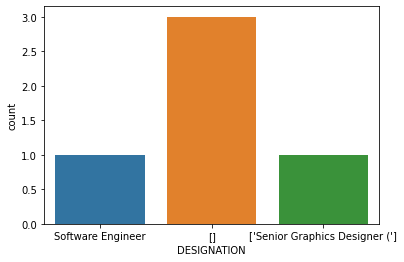

In [55]:
#count plot for designation
sns.countplot(data["DESIGNATION"])

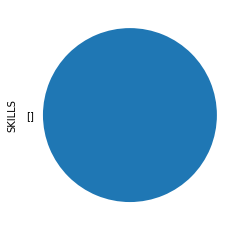

In [56]:
#pie Plott for skills
data["SKILLS"].value_counts().plot(kind='pie')

We can't conclude anything from the charts, because the pie chart only shows program language details and the bar chart specifies all field have equal designation.

# Manual data 

In [57]:
#loading newly created dataset
manual_data=pd.read_excel('/content/manual data orginal.xlsx')

In [58]:
manual_data

,NAME,DEGREE,DESIGNATION,SKILLS,COLLEGE NAME,LOCATION,GRADUATION YEAR,COMPANIES WORKED AT
0,Jebacerin.L,ME,Software Engineer,"C#.NET, ASP.NET, .NET Framework 4.5,WPF, XML, ...",NaN,Trivandrum,NaN,MSN Ltd(Trivandrum)
1,Shaniba M,BTech,Software Developer,ANGULAR 2 AND ABOVE (ANGULAR 8 CURRENTLY WORKI...,COLLEGE OF ENGINEERING VADAKARA,NaN,2015.0,"XMINDS INFOTECH PVT LTD, TRIVANDRUM"
2,Sailesh Earath Krishnan,MCA,Graphics Designer,"Front-end development using HTML, CSS and jQue...",Anna University,Cochin,2008.0,Freelancer
3,Rajesh M,MCA,NaN,"Programming Languages : Java ,Technologies :J2...",Jeppiaar Engineering College,Chennai,2015.0,"Volante Technology, Chennai"
4,Mohanapriya Meganathan\n,BE,Lead Engineer,"Programming Languages : C, C++, Scripting Lang...",T.J.S Engineering College,Chennai,2014.0,HCL Technologies India Private Limited


#Data Inspection

In [59]:
#checking the size of the data frame

manual_data.shape

(5, 8)

In [60]:
#checking data type

manual_data.dtypes

NAME                    object
DEGREE                  object
DESIGNATION             object
SKILLS                  object
COLLEGE NAME            object
LOCATION                object
GRADUATION YEAR        float64
COMPANIES WORKED AT     object
dtype: object

In [61]:
#checking null values

manual_data.isna().sum()

NAME                   0
DEGREE                 0
DESIGNATION            1
SKILLS                 0
COLLEGE NAME           1
LOCATION               1
GRADUATION YEAR        1
COMPANIES WORKED AT    0
dtype: int64

In [62]:
#checking basic information of dataset

manual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAME                 5 non-null      object 
 1   DEGREE               5 non-null      object 
 2   DESIGNATION          4 non-null      object 
 3   SKILLS               5 non-null      object 
 4   COLLEGE NAME         4 non-null      object 
 5   LOCATION             4 non-null      object 
 6   GRADUATION YEAR      4 non-null      float64
 7   COMPANIES WORKED AT  5 non-null      object 
dtypes: float64(1), object(7)
memory usage: 448.0+ bytes


Manual dataframe is created manualy in excel sheet. From the inspected data we can say that there are eight features and thier values. most of them are object type except graduation year. The missing values are low compaire to predicted dataframe.

#EDA for actual dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning



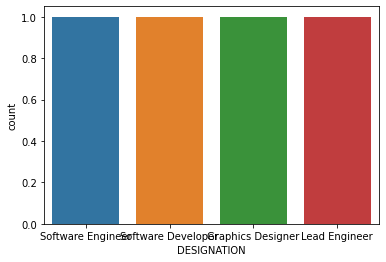

In [63]:
#count plot for designation
sns.countplot(manual_data["DESIGNATION"])

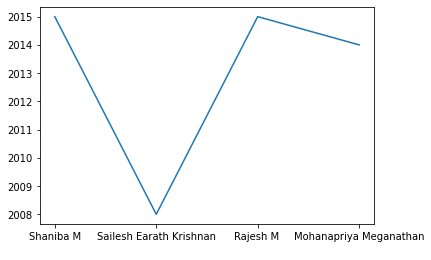

In [64]:
#line plot for the relation of name and graduation year
plt.plot(manual_data['NAME'],manual_data['GRADUATION YEAR'])

plt.show()

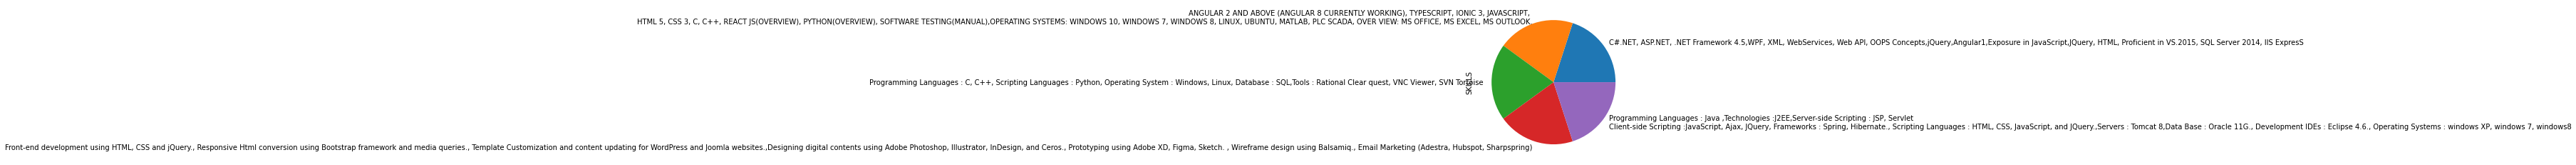

In [65]:
#pie Plott for skills
manual_data["SKILLS"].value_counts().plot(kind='pie')

Same as the predicted dataframe details we can't say anything from the charts. both the Eda is not help for our work. we can't conclude anything from this details.

#Merging Predicted and Actual dataset

#Predicted Dataset



In [66]:
#load predicted dataset and show the dataset

df= pd.read_csv('/content/merged (1).csv', index_col=[0])
df

,NAME,DEGREE,DESIGNATION,SKILLS,COLLEGE NAME,LOCATION,GRADUATION YEAR,COMPANIES WORKED AT,EMAIL ADDRESS
0,NaN,"Exposure in JavaScript,JQuery,",●,Exenta Software Pvt. Ltd (Trivandrum) – Softwa...,Banking Software,NaN,NaN,(17 JUL 2019 – Till Date) CERTIFICATION...,NaN
6,[],['B-tech graduate with 3+ year experience in w...,[],"['SOFTWARE DEVELOPER, XMINDS INFOTECH PVT LTD,...","['SOFTWARE TESTING(MANUAL)', 'Languages Known:...",[],[],[],[]
7,['1 '],['B.Sc. Mathematics'],['Sailesh Earath Krishnan'],"['● Front-end development using HTML, CSS and...","['Calicut University', 'Sailesh Earath Krishnan']",[],[],['University'],[]
8,['Rajesh M'],['7 members Role'],[],"['Volante Technology, Chennai from June 2020 t...",[],[],['2015'],[],[]
9,['Mohanapriya Meganathan '],"['T.J.S Engineering College, Chennai', 'HSC', ...",['Associate Software Engineer'],"['Programming Languages : C, C++']","['Electronics and Communication Engineering', ...",[],[],[],"['E. Meganathan', 'Married']"


In [67]:
#take the transpose of predicted dataset

predicte_datatrans = df.transpose()
predicte_datatrans

,0,6,7,8,9
NAME,NaN,[],['1 '],['Rajesh M'],['Mohanapriya Meganathan ']
DEGREE,"Exposure in JavaScript,JQuery,",['B-tech graduate with 3+ year experience in w...,['B.Sc. Mathematics'],['7 members Role'],"['T.J.S Engineering College, Chennai', 'HSC', ..."
DESIGNATION,●,[],['Sailesh Earath Krishnan'],[],['Associate Software Engineer']
SKILLS,Exenta Software Pvt. Ltd (Trivandrum) – Softwa...,"['SOFTWARE DEVELOPER, XMINDS INFOTECH PVT LTD,...","['● Front-end development using HTML, CSS and...","['Volante Technology, Chennai from June 2020 t...","['Programming Languages : C, C++']"
COLLEGE NAME,Banking Software,"['SOFTWARE TESTING(MANUAL)', 'Languages Known:...","['Calicut University', 'Sailesh Earath Krishnan']",[],"['Electronics and Communication Engineering', ..."
LOCATION,NaN,[],[],[],[]
GRADUATION YEAR,NaN,[],[],['2015'],[]
COMPANIES WORKED AT,(17 JUL 2019 – Till Date) CERTIFICATION...,[],['University'],[],[]
EMAIL ADDRESS,NaN,[],[],[],"['E. Meganathan', 'Married']"


In [68]:
#no value present in email row so its an unwanted data, so it delete from dataset

predicte_datatrans = predicte_datatrans.drop(labels="EMAIL ADDRESS", axis=0)

In [69]:
#rename the columns in predicted dataset

predicte_datatrans.columns = ['resume_pred1','resume_pred2','resume_pred3','resume_pred4','resume_pred5']

In [70]:
#print the new column name of predicted dataset

print(predicte_datatrans.columns)

Index(['resume_pred1', 'resume_pred2', 'resume_pred3', 'resume_pred4',
       'resume_pred5'],
      dtype='object')


We applying transpose to the predicted dataframe for inter changing the rows and columns in the dataframe. and remove the EMAIL ADRESS column because it has no values and also this data is not available in manual dataframe. Finaly rename the column name as resume_pred1,resume_pred2.....

#Actual Dataset

In [71]:
#load the actual dataset and show the details

df1= pd.read_excel('/content/manual data orginal.xlsx')
df1

,NAME,DEGREE,DESIGNATION,SKILLS,COLLEGE NAME,LOCATION,GRADUATION YEAR,COMPANIES WORKED AT
0,Jebacerin.L,ME,Software Engineer,"C#.NET, ASP.NET, .NET Framework 4.5,WPF, XML, ...",NaN,Trivandrum,NaN,MSN Ltd(Trivandrum)
1,Shaniba M,BTech,Software Developer,ANGULAR 2 AND ABOVE (ANGULAR 8 CURRENTLY WORKI...,COLLEGE OF ENGINEERING VADAKARA,NaN,2015.0,"XMINDS INFOTECH PVT LTD, TRIVANDRUM"
2,Sailesh Earath Krishnan,MCA,Graphics Designer,"Front-end development using HTML, CSS and jQue...",Anna University,Cochin,2008.0,Freelancer
3,Rajesh M,MCA,NaN,"Programming Languages : Java ,Technologies :J2...",Jeppiaar Engineering College,Chennai,2015.0,"Volante Technology, Chennai"
4,Mohanapriya Meganathan\n,BE,Lead Engineer,"Programming Languages : C, C++, Scripting Lang...",T.J.S Engineering College,Chennai,2014.0,HCL Technologies India Private Limited


In [72]:
#take the transpose if the actual dataset

manual_datatrans = df1.transpose()
manual_datatrans

,0,1,2,3,4
NAME,Jebacerin.L,Shaniba M,Sailesh Earath Krishnan,Rajesh M,Mohanapriya Meganathan\n
DEGREE,ME,BTech,MCA,MCA,BE
DESIGNATION,Software Engineer,Software Developer,Graphics Designer,NaN,Lead Engineer
SKILLS,"C#.NET, ASP.NET, .NET Framework 4.5,WPF, XML, ...",ANGULAR 2 AND ABOVE (ANGULAR 8 CURRENTLY WORKI...,"Front-end development using HTML, CSS and jQue...","Programming Languages : Java ,Technologies :J2...","Programming Languages : C, C++, Scripting Lang..."
COLLEGE NAME,NaN,COLLEGE OF ENGINEERING VADAKARA,Anna University,Jeppiaar Engineering College,T.J.S Engineering College
LOCATION,Trivandrum,NaN,Cochin,Chennai,Chennai
GRADUATION YEAR,NaN,2015,2008,2015,2014
COMPANIES WORKED AT,MSN Ltd(Trivandrum),"XMINDS INFOTECH PVT LTD, TRIVANDRUM",Freelancer,"Volante Technology, Chennai",HCL Technologies India Private Limited


In [73]:
#rename the columns in actual dataset

manual_datatrans.columns = ['resume_act1','resume_act2','resume_act3','resume_act4','resume_act5']

In [74]:
#print the new column name of actual dataset

print(manual_datatrans.columns)

Index(['resume_act1', 'resume_act2', 'resume_act3', 'resume_act4',
       'resume_act5'],
      dtype='object')


We applying transpose to the manual dataframe for inter changing the rows and columns in the dataframe. Finaly rename the column name as resume_act1, resume_act2.....



#Merging

In [75]:
# using a .concat for union of dataframe (set axes join = outer for union of dataframe.)

res = pd.concat([manual_datatrans,predicte_datatrans], axis=1, sort=False)
 
res

,resume_act1,resume_act2,resume_act3,resume_act4,resume_act5,resume_pred1,resume_pred2,resume_pred3,resume_pred4,resume_pred5
NAME,Jebacerin.L,Shaniba M,Sailesh Earath Krishnan,Rajesh M,Mohanapriya Meganathan\n,NaN,[],['1 '],['Rajesh M'],['Mohanapriya Meganathan ']
DEGREE,ME,BTech,MCA,MCA,BE,"Exposure in JavaScript,JQuery,",['B-tech graduate with 3+ year experience in w...,['B.Sc. Mathematics'],['7 members Role'],"['T.J.S Engineering College, Chennai', 'HSC', ..."
DESIGNATION,Software Engineer,Software Developer,Graphics Designer,NaN,Lead Engineer,●,[],['Sailesh Earath Krishnan'],[],['Associate Software Engineer']
SKILLS,"C#.NET, ASP.NET, .NET Framework 4.5,WPF, XML, ...",ANGULAR 2 AND ABOVE (ANGULAR 8 CURRENTLY WORKI...,"Front-end development using HTML, CSS and jQue...","Programming Languages : Java ,Technologies :J2...","Programming Languages : C, C++, Scripting Lang...",Exenta Software Pvt. Ltd (Trivandrum) – Softwa...,"['SOFTWARE DEVELOPER, XMINDS INFOTECH PVT LTD,...","['● Front-end development using HTML, CSS and...","['Volante Technology, Chennai from June 2020 t...","['Programming Languages : C, C++']"
COLLEGE NAME,NaN,COLLEGE OF ENGINEERING VADAKARA,Anna University,Jeppiaar Engineering College,T.J.S Engineering College,Banking Software,"['SOFTWARE TESTING(MANUAL)', 'Languages Known:...","['Calicut University', 'Sailesh Earath Krishnan']",[],"['Electronics and Communication Engineering', ..."
LOCATION,Trivandrum,NaN,Cochin,Chennai,Chennai,NaN,[],[],[],[]
GRADUATION YEAR,NaN,2015,2008,2015,2014,NaN,[],[],['2015'],[]
COMPANIES WORKED AT,MSN Ltd(Trivandrum),"XMINDS INFOTECH PVT LTD, TRIVANDRUM",Freelancer,"Volante Technology, Chennai",HCL Technologies India Private Limited,(17 JUL 2019 – Till Date) CERTIFICATION...,[],['University'],[],[]


In [76]:
#replace the [] into nan

res1 = res.replace(to_replace =["[]"],
                 value ="")

res1

,resume_act1,resume_act2,resume_act3,resume_act4,resume_act5,resume_pred1,resume_pred2,resume_pred3,resume_pred4,resume_pred5
NAME,Jebacerin.L,Shaniba M,Sailesh Earath Krishnan,Rajesh M,Mohanapriya Meganathan\n,NaN,,['1 '],['Rajesh M'],['Mohanapriya Meganathan ']
DEGREE,ME,BTech,MCA,MCA,BE,"Exposure in JavaScript,JQuery,",['B-tech graduate with 3+ year experience in w...,['B.Sc. Mathematics'],['7 members Role'],"['T.J.S Engineering College, Chennai', 'HSC', ..."
DESIGNATION,Software Engineer,Software Developer,Graphics Designer,NaN,Lead Engineer,●,,['Sailesh Earath Krishnan'],,['Associate Software Engineer']
SKILLS,"C#.NET, ASP.NET, .NET Framework 4.5,WPF, XML, ...",ANGULAR 2 AND ABOVE (ANGULAR 8 CURRENTLY WORKI...,"Front-end development using HTML, CSS and jQue...","Programming Languages : Java ,Technologies :J2...","Programming Languages : C, C++, Scripting Lang...",Exenta Software Pvt. Ltd (Trivandrum) – Softwa...,"['SOFTWARE DEVELOPER, XMINDS INFOTECH PVT LTD,...","['● Front-end development using HTML, CSS and...","['Volante Technology, Chennai from June 2020 t...","['Programming Languages : C, C++']"
COLLEGE NAME,NaN,COLLEGE OF ENGINEERING VADAKARA,Anna University,Jeppiaar Engineering College,T.J.S Engineering College,Banking Software,"['SOFTWARE TESTING(MANUAL)', 'Languages Known:...","['Calicut University', 'Sailesh Earath Krishnan']",,"['Electronics and Communication Engineering', ..."
LOCATION,Trivandrum,NaN,Cochin,Chennai,Chennai,NaN,,,,
GRADUATION YEAR,NaN,2015,2008,2015,2014,NaN,,,['2015'],
COMPANIES WORKED AT,MSN Ltd(Trivandrum),"XMINDS INFOTECH PVT LTD, TRIVANDRUM",Freelancer,"Volante Technology, Chennai",HCL Technologies India Private Limited,(17 JUL 2019 – Till Date) CERTIFICATION...,,['University'],,


Merged the predicted and manual dataframe for future use. The [ ] (square brackets) is replaced by " " (empty string). and download it 

#Calculating ratio

In [77]:
#loading the merged dataset named as final_dataset

res2 = pd.read_csv('/content/final_dataset.csv')
res2

,Unnamed: 0,resume_act1,resume_act2,resume_act3,resume_act4,resume_act5,resume_pred1,resume_pred2,resume_pred3,resume_pred4,resume_pred5
0,NAME,Jebacerin.L,Shaniba M,Sailesh Earath Krishnan,Rajesh M,Mohanapriya Meganathan\n,NaN,NaN,['1 '],['Rajesh M'],['Mohanapriya Meganathan ']
1,DEGREE,ME,BTech,MCA,MCA,BE,"Exposure in JavaScript,JQuery,",['B-tech graduate with 3+ year experience in w...,['B.Sc. Mathematics'],['7 members Role'],"['T.J.S Engineering College, Chennai', 'HSC', ..."
2,DESIGNATION,Software Engineer,Software Developer,Graphics Designer,NaN,Lead Engineer,●,NaN,['Sailesh Earath Krishnan'],NaN,['Associate Software Engineer']
3,SKILLS,"C#.NET, ASP.NET, .NET Framework 4.5,WPF, XML, ...",ANGULAR 2 AND ABOVE (ANGULAR 8 CURRENTLY WORKI...,"Front-end development using HTML, CSS and jQue...","Programming Languages : Java ,Technologies :J2...","Programming Languages : C, C++, Scripting Lang...",Exenta Software Pvt. Ltd (Trivandrum) – Softwa...,"['SOFTWARE DEVELOPER, XMINDS INFOTECH PVT LTD,...","['● Front-end development using HTML, CSS and...","['Volante Technology, Chennai from June 2020 t...","['Programming Languages : C, C++']"
4,COLLEGE NAME,NaN,COLLEGE OF ENGINEERING VADAKARA,Anna University,Jeppiaar Engineering College,T.J.S Engineering College,Banking Software,"['SOFTWARE TESTING(MANUAL)', 'Languages Known:...","['Calicut University', 'Sailesh Earath Krishnan']",NaN,"['Electronics and Communication Engineering', ..."
5,LOCATION,Trivandrum,NaN,Cochin,Chennai,Chennai,NaN,NaN,NaN,NaN,NaN
6,GRADUATION YEAR,NaN,2015.0,2008.0,2015.0,2014.0,NaN,NaN,NaN,['2015'],NaN
7,COMPANIES WORKED AT,MSN Ltd(Trivandrum),"XMINDS INFOTECH PVT LTD, TRIVANDRUM",Freelancer,"Volante Technology, Chennai",HCL Technologies India Private Limited,(17 JUL 2019 – Till Date) CERTIFICATION...,NaN,['University'],NaN,NaN


In [78]:
#applying fillna function and fuzz ratio function to final dataset 

res2['ratio1'] = res2.fillna(value="", axis=None, inplace=False).apply(lambda x: fuzz.ratio(x.resume_act1, x.resume_pred1),axis=1)
res2['ratio2'] = res2.fillna(value="", axis=None, inplace=False).apply(lambda x: fuzz.ratio(x.resume_act2, x.resume_pred2),axis=1)
res2['ratio3'] = res2.fillna(value="", axis=None, inplace=False).apply(lambda x: fuzz.ratio(x.resume_act3, x.resume_pred3),axis=1)
res2['ratio4'] = res2.fillna(value="", axis=None, inplace=False).apply(lambda x: fuzz.ratio(x.resume_act4, x.resume_pred4),axis=1)
res2['ratio5'] = res2.fillna(value="", axis=None, inplace=False).apply(lambda x: fuzz.ratio(x.resume_act5, x.resume_pred5),axis=1)

Fuzzywuzzy uses a some similarity ratio between two sequences and returns the similarity percentage.We used the ratio() function above to calculate the Levenshtein distance similarity ratio between the two strings (sequences). The similarity ratio percentage here is different for different columns.

Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series. It comes as a huge improvement for the pandas library as this function helps to segregate data according to the conditions required due to which it is efficiently used in data science and machine learning.

Here new five columns are created for the ratio representation. the fuzzy ratio is used to find matches between two string. Here the actual value and predicted value of each resume is compared and give the ratio between them.

In [79]:
#displaying fuzz ratio value

res2

,Unnamed: 0,resume_act1,resume_act2,resume_act3,resume_act4,resume_act5,resume_pred1,resume_pred2,resume_pred3,resume_pred4,resume_pred5,ratio1,ratio2,ratio3,ratio4,ratio5
0,NAME,Jebacerin.L,Shaniba M,Sailesh Earath Krishnan,Rajesh M,Mohanapriya Meganathan\n,NaN,NaN,['1 '],['Rajesh M'],['Mohanapriya Meganathan '],0,0,12,76,71
1,DEGREE,ME,BTech,MCA,MCA,BE,"Exposure in JavaScript,JQuery,",['B-tech graduate with 3+ year experience in w...,['B.Sc. Mathematics'],['7 members Role'],"['T.J.S Engineering College, Chennai', 'HSC', ...",6,4,8,0,4
2,DESIGNATION,Software Engineer,Software Developer,Graphics Designer,NaN,Lead Engineer,●,NaN,['Sailesh Earath Krishnan'],NaN,['Associate Software Engineer'],0,0,27,100,50
3,SKILLS,"C#.NET, ASP.NET, .NET Framework 4.5,WPF, XML, ...",ANGULAR 2 AND ABOVE (ANGULAR 8 CURRENTLY WORKI...,"Front-end development using HTML, CSS and jQue...","Programming Languages : Java ,Technologies :J2...","Programming Languages : C, C++, Scripting Lang...",Exenta Software Pvt. Ltd (Trivandrum) – Softwa...,"['SOFTWARE DEVELOPER, XMINDS INFOTECH PVT LTD,...","['● Front-end development using HTML, CSS and...","['Volante Technology, Chennai from June 2020 t...","['Programming Languages : C, C++']",28,12,50,18,30
4,COLLEGE NAME,NaN,COLLEGE OF ENGINEERING VADAKARA,Anna University,Jeppiaar Engineering College,T.J.S Engineering College,Banking Software,"['SOFTWARE TESTING(MANUAL)', 'Languages Known:...","['Calicut University', 'Sailesh Earath Krishnan']",NaN,"['Electronics and Communication Engineering', ...",0,23,38,0,14
5,LOCATION,Trivandrum,NaN,Cochin,Chennai,Chennai,NaN,NaN,NaN,NaN,NaN,0,100,0,0,0
6,GRADUATION YEAR,NaN,2015.0,2008.0,2015.0,2014.0,NaN,NaN,NaN,['2015'],NaN,100,0,0,57,0
7,COMPANIES WORKED AT,MSN Ltd(Trivandrum),"XMINDS INFOTECH PVT LTD, TRIVANDRUM",Freelancer,"Volante Technology, Chennai",HCL Technologies India Private Limited,(17 JUL 2019 – Till Date) CERTIFICATION...,NaN,['University'],NaN,NaN,12,0,25,0,0


The actual value is compare to corresponding predicted value. ie, resume_act1 value is compare with resume_pred1 value.
This Ratio is used to find the model accuracy. we got most of the ratio values in different columns.

In [80]:
#calculating average score for ratio1 to ratio5

df_new = res2[['ratio1', 'ratio2', 'ratio3', 'ratio4', 'ratio5']]
avg_score = df_new.mean(axis=1)
avg_score

0    31.8
1     4.4
2    35.4
3    27.6
4    15.0
5    20.0
6    31.4
7     7.4
dtype: float64

caluculating the average score in each row.

In [81]:
#calculating average score for each resume

avg_resume_score = df_new.mean()
avg_resume_score.index = ['Resume1', 'Resume2', 'Resume3', 'Resume4', 'Resume5']
avg_resume_score

Resume1    18.250
Resume2    17.375
Resume3    20.000
Resume4    31.375
Resume5    21.125
dtype: float64

Calculating average score for each resume.Most of the data and resumes shows similarity in between thier actual data and predicted data. Our model gave a good resul for resume parsing.

**Conclusion**

The main objective of Natural Language Processing (NLP)-based Resume Parser in Python project is to extract the required information about candidates without having to go through each and every resume manually, which ultimately leads to a more time and energy-efficient process.  By using the NLP model, we can extract most of the important data like name, location, degree… from the resume. Its all done by the entity and the key words present in the resume. The matching of predicted resume and actual resume is formed here. The fuzzy ratio is used to calculate the comparison value between the resumes. The row wise and column wise ratio is calculated. All the values are shows below 50 so the model is working in good form. The extraction of the data from the resume is moderately good. In future we can improve the accuracy of the model to extract all the data. Test the model further and make it work on resumes from all over the world. Improve the dataset to extract more entity types like Address, Date of birth, Companies worked for, Working Duration, Graduation Year, Achievements, Strength and weaknesses, Nationality, Career Objective, CGPA/GPA/Percentage/Result.
